# Task 3: Word-level Vanilla RNN
Implement Backpropagation through time: In a vanilla RNN with a single hidden layer you must have three sets of weights: U, V, W. And, you use softmax units for the output layer and tanh units for the hidden layer. • Now, train your recurrent neural network using the dataset you created above. You are free to choose learning parameters (sentence length, i.e., number of words in each, learning rate, etc.). • Report the training loss vs epochs as a plot. • During training, choose 5 breakpoints (e.g., you train the network for 100 epochs and you choose the end of epoch 20, 40, 60, 80, 100) and show how well your network learns through time. You can do it by feeding in the network a chunk of your training text and show what is the output of the network. Also, report about gradient check routine. • You are going to explore how the network learns when we change the following parameters: (a) Number of hidden units: Try doubling and halving your number of hidden units. And after training, plot the training loss vs the number of training epochs, and show the text sampling results. Discuss your findings. (b) Sentence length: Try doubling and halving your length of sentence that feeds into the network. And after training, plot the training loss vs the number of training epochs, and show the text sampling results. Discuss your findings

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import csv
import itertools
import operator
import numpy as np
import sys
from datetime import datetime

import matplotlib.pyplot as plt

In [3]:

import nltk

In [4]:
vocabulary_size = 8000
unknown_token = "#"
sentence_start_token = "SENTENCE_START"
sentence_end_token = "SENTENCE_END"

In [5]:
data = open('concatinated.txt', 'r').read()

In [6]:
sentences = nltk.sent_tokenize(data)

In [7]:
sentences = ["%s %s %s" % (sentence_start_token, x, sentence_end_token) for x in sentences]

In [8]:
sentences[:1]

['SENTENCE_START The Project Gutenberg EBook of The Mysterious Island, by Jules Verne\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever. SENTENCE_END']

In [9]:
tokenized_sentences = [nltk.word_tokenize(sent) for sent in sentences]

In [10]:
tokenized_sentences

[['SENTENCE_START',
  'The',
  'Project',
  'Gutenberg',
  'EBook',
  'of',
  'The',
  'Mysterious',
  'Island',
  ',',
  'by',
  'Jules',
  'Verne',
  'This',
  'eBook',
  'is',
  'for',
  'the',
  'use',
  'of',
  'anyone',
  'anywhere',
  'at',
  'no',
  'cost',
  'and',
  'with',
  'almost',
  'no',
  'restrictions',
  'whatsoever',
  '.',
  'SENTENCE_END'],
 ['SENTENCE_START',
  'You',
  'may',
  'copy',
  'it',
  ',',
  'give',
  'it',
  'away',
  'or',
  're-use',
  'it',
  'under',
  'the',
  'terms',
  'of',
  'the',
  'Project',
  'Gutenberg',
  'License',
  'included',
  'with',
  'this',
  'eBook',
  'or',
  'online',
  'at',
  'www.gutenberg.org',
  'Title',
  ':',
  'The',
  'Mysterious',
  'Island',
  'Author',
  ':',
  'Jules',
  'Verne',
  'Posting',
  'Date',
  ':',
  'August',
  '24',
  ',',
  '2008',
  '[',
  'EBook',
  '#',
  '1268',
  ']',
  'Release',
  'Date',
  ':',
  'April',
  ',',
  '1998',
  'Last',
  'Updated',
  ':',
  'October',
  '13',
  ',',
  '2016',


In [11]:
word_freq = nltk.FreqDist(itertools.chain(*tokenized_sentences))
print("Found %d unique words tokens." % len(word_freq.items()))

Found 17597 unique words tokens.


In [12]:
word_freq

FreqDist({',': 30846, 'the': 25225, 'SENTENCE_START': 18011, 'SENTENCE_END': 18011, '.': 15677, 'of': 12252, 'to': 9588, 'and': 9121, 'a': 6734, 'was': 5532, ...})

In [13]:
# Get the most common words and build index_to_word and word_to_index vectors
vocab = word_freq.most_common(vocabulary_size-1)
index_to_word = [x[0] for x in vocab]
index_to_word.append(unknown_token)
word_to_index = dict([(w,i) for i,w in enumerate(index_to_word)])

In [14]:
word_to_index

{',': 0,
 'the': 1,
 'SENTENCE_START': 2,
 'SENTENCE_END': 3,
 '.': 4,
 'of': 5,
 'to': 6,
 'and': 7,
 'a': 8,
 'was': 9,
 'in': 10,
 '“': 11,
 '”': 12,
 'that': 13,
 'which': 14,
 'it': 15,
 'I': 16,
 'had': 17,
 'not': 18,
 "''": 19,
 'his': 20,
 'he': 21,
 'The': 22,
 '``': 23,
 'with': 24,
 'be': 25,
 'on': 26,
 'at': 27,
 '!': 28,
 'by': 29,
 'as': 30,
 'for': 31,
 'is': 32,
 'this': 33,
 'were': 34,
 ';': 35,
 '?': 36,
 'from': 37,
 'have': 38,
 'we': 39,
 'they': 40,
 'would': 41,
 'my': 42,
 'but': 43,
 'you': 44,
 '--': 45,
 'It': 46,
 'all': 47,
 'been': 48,
 'Pencroft': 49,
 'an': 50,
 'him': 51,
 'could': 52,
 'or': 53,
 'their': 54,
 'said': 55,
 'no': 56,
 '’': 57,
 'one': 58,
 'Harding': 59,
 'will': 60,
 'are': 61,
 'But': 62,
 'them': 63,
 'if': 64,
 'so': 65,
 'some': 66,
 'there': 67,
 'who': 68,
 'our': 69,
 'more': 70,
 'then': 71,
 'Herbert': 72,
 'its': 73,
 'He': 74,
 'very': 75,
 'time': 76,
 'replied': 77,
 'Cyrus': 78,
 'any': 79,
 'into': 80,
 'Fogg': 81,
 '

In [15]:
print("Using vocabulary size %d." % vocabulary_size)
print("The least frequent word in our vocabulary is '%s' and appeared %d times." % (vocab[-1][0], vocab[-1][1]))
word_freq.most_common(10)

Using vocabulary size 8000.
The least frequent word in our vocabulary is 'omelet' and appeared 2 times.


[(',', 30846),
 ('the', 25225),
 ('SENTENCE_START', 18011),
 ('SENTENCE_END', 18011),
 ('.', 15677),
 ('of', 12252),
 ('to', 9588),
 ('and', 9121),
 ('a', 6734),
 ('was', 5532)]

In [16]:
index_to_word[7999]

'#'

In [17]:
# Replace all words not in our vocabulary with the unknown token
for i, sent in enumerate(tokenized_sentences):
    tokenized_sentences[i] = [w if w in word_to_index else unknown_token for w in sent]

In [18]:
print("\nExample sentence: '%s'" % sentences[0])
print("\nExample sentence after Pre-processing: '%s'" % tokenized_sentences[0])


Example sentence: 'SENTENCE_START The Project Gutenberg EBook of The Mysterious Island, by Jules Verne

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever. SENTENCE_END'

Example sentence after Pre-processing: '['SENTENCE_START', 'The', 'Project', 'Gutenberg', 'EBook', 'of', 'The', 'Mysterious', 'Island', ',', 'by', 'Jules', 'Verne', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', '.', 'SENTENCE_END']'


In [20]:
import random
# Print an training data example
for i in range(5):
    idx = random.randint(0,len(XTrain))
    x_example, y_example = XTrain[idx], yTrain[idx]
    print ("Sample id %d\n=====================\n" % idx)
    print ("x:\n%s\n%s" % (" ".join([index_to_word[x] for x in x_example]), x_example))
    print ("\ny:\n%s\n%s" % (" ".join([index_to_word[x] for x in y_example]), y_example))

Sample id 13898

x:
SENTENCE_START I did not even dream .
[2, 16, 83, 18, 143, 1776, 4]

y:
I did not even dream . SENTENCE_END
[16, 83, 18, 143, 1776, 4, 3]
Sample id 3169

x:
SENTENCE_START As to Cyrus Harding , he did not speak ; he simply gazed , and by the mistrust which his look expressed , it appeared that he was examining some strange country .
[2, 181, 6, 78, 59, 0, 21, 83, 18, 502, 35, 21, 610, 1009, 0, 7, 29, 1, 5882, 14, 20, 487, 2641, 0, 15, 153, 13, 21, 9, 1670, 66, 615, 398, 4]

y:
As to Cyrus Harding , he did not speak ; he simply gazed , and by the mistrust which his look expressed , it appeared that he was examining some strange country . SENTENCE_END
[181, 6, 78, 59, 0, 21, 83, 18, 502, 35, 21, 610, 1009, 0, 7, 29, 1, 5882, 14, 20, 487, 2641, 0, 15, 153, 13, 21, 9, 1670, 66, 615, 398, 4, 3]
Sample id 2889

x:
SENTENCE_START As to the damage caused by the storm in the forest , that could not as yet be ascertained ; they would have to wait till the snowy covering was d

In [28]:
class RNNVanilla:
     
    def __init__(self, word_dim, hidden_dim=100, bptt_truncate=4):
        
        # Assign instance variables
        self.word_dim = word_dim   #size of the vocabulary
        self.hidden_dim = hidden_dim  # size of hidden layer
        self.bptt_truncate = bptt_truncate
        
        # Randomly initialize the network parameters
        self.U = np.random.uniform(-np.sqrt(1./word_dim), np.sqrt(1./word_dim), (hidden_dim, word_dim))
        self.V = np.random.uniform(-np.sqrt(1./hidden_dim), np.sqrt(1./hidden_dim), (word_dim, hidden_dim))
        self.W = np.random.uniform(-np.sqrt(1./hidden_dim), np.sqrt(1./hidden_dim), (hidden_dim, hidden_dim))

In [21]:
class RNNVanilla:
     
    def __init__(self, word_dim, hidden_dim=200, bptt_truncate=4):
        
        # Assign instance variables
        self.word_dim = word_dim   #size of the vocabulary
        self.hidden_dim = hidden_dim  # size of hidden layer
        self.bptt_truncate = bptt_truncate
        
        # Randomly initialize the network parameters
        self.U = np.random.uniform(-np.sqrt(1./word_dim), np.sqrt(1./word_dim), (hidden_dim, word_dim))
        self.V = np.random.uniform(-np.sqrt(1./hidden_dim), np.sqrt(1./hidden_dim), (word_dim, hidden_dim))
        self.W = np.random.uniform(-np.sqrt(1./hidden_dim), np.sqrt(1./hidden_dim), (hidden_dim, hidden_dim))

In [37]:
class RNNVanilla:
     
    def __init__(self, word_dim, hidden_dim=50, bptt_truncate=4):
        
        # Assign instance variables
        self.word_dim = word_dim   #size of the vocabulary
        self.hidden_dim = hidden_dim  # size of hidden layer
        self.bptt_truncate = bptt_truncate
        
        # Randomly initialize the network parameters
        self.U = np.random.uniform(-np.sqrt(1./word_dim), np.sqrt(1./word_dim), (hidden_dim, word_dim))
        self.V = np.random.uniform(-np.sqrt(1./hidden_dim), np.sqrt(1./hidden_dim), (word_dim, hidden_dim))
        self.W = np.random.uniform(-np.sqrt(1./hidden_dim), np.sqrt(1./hidden_dim), (hidden_dim, hidden_dim))

In [38]:
def softmax(x):
    xt = np.exp(x - np.max(x))
    return xt / np.sum(xt)

In [39]:
def forward_propagation(self, x):
    # The total number of time steps
    T = len(x)
        
    # During forward propagation we save all hidden states in s because need them later.
        
    # We add one additional element for the initial hidden, which we set to 0
    s = np.zeros((T + 1, self.hidden_dim)) 
    s[-1] = np.zeros(self.hidden_dim)
        
    # The outputs at each time step. Again, we save them for later.
    o = np.zeros((T, self.word_dim))
        
    # For each time step...
    for t in np.arange(T):
        # Note that we are indxing U by x[t]. This is the same as multiplying U with a one-hot vector.
        s[t] = np.tanh(self.U[:,x[t]] + self.W.dot(s[t-1]))
        o[t] = softmax(self.V.dot(s[t]))
    return [o, s]  #We not only return the calculated outputs, but also the hidden states. 
                   #We will use them later to calculate the gradients

#Now make it a member of the class RNNVanilla
RNNVanilla.forward_propagation = forward_propagation

In [40]:
def predict(self, x):
    # Perform forward propagation and return index of the highest score
    o, s = self.forward_propagation(x)
    return np.argmax(o, axis=1)

#Now make it a member of the class RNNVanilla
RNNVanilla.predict = predict

In [41]:
print("length of XTrain[10] is %d" % (len(XTrain[10])))
np.random.seed(10)

model = RNNVanilla(vocabulary_size)
o, s = model.forward_propagation(XTrain[10])
print(o.shape)
print(o)

length of XTrain[10] is 38
(38, 8000)
[[0.00012467 0.00012468 0.00012489 ... 0.00012492 0.00012476 0.00012494]
 [0.0001255  0.00012523 0.00012619 ... 0.00012462 0.00012551 0.00012578]
 [0.00012471 0.00012526 0.00012403 ... 0.00012541 0.00012604 0.00012507]
 ...
 [0.00012557 0.00012577 0.0001252  ... 0.00012481 0.00012588 0.00012575]
 [0.00012475 0.00012462 0.00012498 ... 0.00012519 0.0001261  0.0001249 ]
 [0.00012507 0.0001257  0.00012533 ... 0.00012637 0.00012438 0.00012581]]


In [42]:
predictions = model.predict(XTrain[10])
print(predictions.shape)
print(predictions)
print("index_to_word>")
print('%s'%" ".join([index_to_word[x] for x in predictions]))

(38,)
[7292 7013  194 7466 1078 2288 7864 3496 1370 5372 7814 1624 6592 1320
 3052 4948 5764 4585 1980 3641 5183 2888 7366 7427 6236 7969 1192 5849
 1325 3643 6666 1968 2252 5274 4977 3811 6503 7622]
index_to_word>
ceasing manufactories Fix Executive Who Hamburg Martha boots purpose countless schist sleeping toes 1 barometer Stop thrust serpents distribution detached convey holder codes deletions ensconced insured 3 solidity devoted wave diversified metal victim waist requiring dreams footstep reassure


In [43]:
def calculate_total_loss(self, x, y):
    L = 0
    
    # For each sentence...
    for i in np.arange(len(y)):
        o, s = self.forward_propagation(x[i])
        
        # We only care about our prediction of the "correct" words
        correct_word_predictions = o[np.arange(len(y[i])), y[i]]
        
        # Add to the loss based on how off we were
        L += -1 * sum(np.log(correct_word_predictions))
    return L
 
def calculate_loss(self, x, y):
    # Divide the total loss by the number of training examples
    N = sum((len(y_i) for y_i in y))
    return self.calculate_total_loss(x,y)/N
 
RNNVanilla.calculate_total_loss = calculate_total_loss
RNNVanilla.calculate_loss = calculate_loss

In [44]:
def bptt(self, x, y):
    T = len(y)
    # Perform forward propagation
    o, s = self.forward_propagation(x)
    # We accumulate the gradients in these variables
    dLdU = np.zeros(self.U.shape)
    dLdV = np.zeros(self.V.shape)
    dLdW = np.zeros(self.W.shape)
    delta_o = o
    delta_o[np.arange(len(y)), y] -= 1.
    # For each output backwards...
    for t in np.arange(T)[::-1]:
        dLdV += np.outer(delta_o[t], s[t].T)
        
        # Initial delta calculation
        delta_t = self.V.T.dot(delta_o[t]) * (1 - (s[t] ** 2))
        
        # Backpropagation through time (for at most self.bptt_truncate steps)
        for bptt_step in np.arange(max(0, t-self.bptt_truncate), t+1)[::-1]:
            
            # print "Backpropagation step t=%d bptt step=%d " % (t, bptt_step)
            dLdW += np.outer(delta_t, s[bptt_step-1])              
            dLdU[:,x[bptt_step]] += delta_t
            
            # Update delta for next step
            delta_t = self.W.T.dot(delta_t) * (1 - s[bptt_step-1] ** 2)
    return [dLdU, dLdV, dLdW]
 
RNNVanilla.bptt = bptt

In [45]:
def gradient_check(self, x, y, h=0.001, error_threshold=0.01):
    # Calculate the gradients using backpropagation. We want to checker if these are correct.
    bptt_gradients = self.bptt(x, y)
    
    # List of all parameters we want to check.
    model_parameters = ['U', 'V', 'W']
    
    # Gradient check for each parameter
    for pidx, pname in enumerate(model_parameters):
        # Get the actual parameter value from the mode, e.g. model.W
        parameter = operator.attrgetter(pname)(self)
        print ("Performing gradient check for parameter %s with size %d." % (pname, np.prod(parameter.shape)))
        # Iterate over each element of the parameter matrix, e.g. (0,0), (0,1), ...
        it = np.nditer(parameter, flags=['multi_index'], op_flags=['readwrite'])
        while not it.finished:
            ix = it.multi_index
            # Save the original value so we can reset it later
            original_value = parameter[ix]
            # Estimate the gradient using (f(x+h) - f(x-h))/(2*h)
            parameter[ix] = original_value + h
            gradplus = self.calculate_total_loss([x],[y])
            parameter[ix] = original_value - h
            gradminus = self.calculate_total_loss([x],[y])
            estimated_gradient = (gradplus - gradminus)/(2*h)
            # Reset parameter to original value
            parameter[ix] = original_value
            # The gradient for this parameter calculated using backpropagation
            backprop_gradient = bptt_gradients[pidx][ix]
            # calculate The relative error: (|x - y|/(|x| + |y|))
            relative_error = np.abs(backprop_gradient - estimated_gradient)/(np.abs(backprop_gradient) + np.abs(estimated_gradient))
            # If the error is to large fail the gradient check
            if relative_error > error_threshold:
                print ("Gradient Check ERROR: parameter=%s ix=%s" % (pname, ix))
                print ("+h Loss: %f" % gradplus)
                print ("-h Loss: %f" % gradminus)
                print ("Estimated_gradient: %f" % estimated_gradient)
                print ("Backpropagation gradient: %f" % backprop_gradient)
                print ("Relative Error: %f" % relative_error)
                return
            it.iternext()
        print ("Gradient check for parameter %s passed." % (pname))
 
RNNVanilla.gradient_check = gradient_check

In [46]:
grad_check_vocab_size = 100
np.random.seed(10)
model = RNNVanilla(grad_check_vocab_size, 10, bptt_truncate=1000)
model.gradient_check([0,1,2,3], [1,2,3,4])

Performing gradient check for parameter U with size 1000.


C:\Users\kusha\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars


Gradient check for parameter U passed.
Performing gradient check for parameter V with size 1000.
Gradient check for parameter V passed.
Performing gradient check for parameter W with size 100.
Gradient check for parameter W passed.


In [47]:
# Performs one step of SGD.
def numpy_sdg_step(self, x, y, learning_rate):
    # Calculate the gradients
    dLdU, dLdV, dLdW = self.bptt(x, y)
    # Change parameters according to gradients and learning rate
    self.U -= learning_rate * dLdU
    self.V -= learning_rate * dLdV
    self.W -= learning_rate * dLdW
    
RNNVanilla.sgd_step = numpy_sdg_step

In [48]:
def train_with_sgd(model, X_train, y_train, learning_rate=0.005, nepoch=100, evaluate_loss_after=20):
    # We keep track of the losses so we can plot them later
    losses = []
    num_examples_seen = 0
    for epoch in range(nepoch):
        # Optionally evaluate the loss
        if (epoch % evaluate_loss_after == 0):
            loss = model.calculate_loss(X_train, y_train)
            losses.append((num_examples_seen, loss))
            #losses.append((loss))
            time = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
            print ("%s: Loss after num_examples_seen=%d epoch=%d: %f" % (time, num_examples_seen, epoch, loss))
            # Adjust the learning rate if loss increases
            if (len(losses) > 1 and losses[-1][1] > losses[-2][1]):
                learning_rate = learning_rate * 0.5 
                print ("Setting learning rate to %f" % learning_rate)
            sys.stdout.flush()
        # For each training example...
        for i in range(len(y_train)):
            # One SGD step
            model.sgd_step(X_train[i], y_train[i], learning_rate)
            num_examples_seen += 1
    return losses

In [33]:
np.random.seed(10)
model = RNNVanilla(vocabulary_size)
%timeit model.sgd_step(XTrain[10], yTrain[10], learning_rate=0.005)

877 ms ± 36 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [41]:
np.random.seed(10)
# Train on a small subset of the data to see what happens
model = RNNVanilla(vocabulary_size)
losses = train_with_sgd(model, XTrain[:100], yTrain[:100], nepoch=100, evaluate_loss_after=20)

2019-11-02 18:43:25: Loss after num_examples_seen=0 epoch=0: 8.987062
2019-11-02 18:50:18: Loss after num_examples_seen=2000 epoch=20: 5.169275
2019-11-02 18:56:49: Loss after num_examples_seen=4000 epoch=40: 4.714517
2019-11-02 19:03:15: Loss after num_examples_seen=6000 epoch=60: 4.324054
2019-11-02 19:09:42: Loss after num_examples_seen=8000 epoch=80: 4.004945


In [42]:
output = [lis[1] for lis in losses]
output

[8.987061524537163,
 5.1692752693435855,
 4.7145166020153,
 4.324053532689037,
 4.004945015766341]

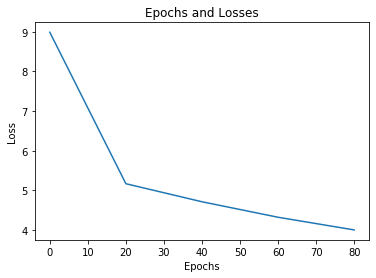

In [43]:
epoch=[0,20,40,60,80]
#plt.figure(0)
plt.title("Epochs and Losses")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(epoch,output)
plt.show()

In [34]:
np.random.seed(10)
# Train on a small subset of the data to see what happens
model1 = RNNVanilla(vocabulary_size)
losses1 = train_with_sgd(model1, XTrain[:100], yTrain[:100], nepoch=100, evaluate_loss_after=20)

2019-11-03 20:40:35: Loss after num_examples_seen=0 epoch=0: 8.986112
2019-11-03 20:53:57: Loss after num_examples_seen=2000 epoch=20: 5.194776
2019-11-03 21:06:18: Loss after num_examples_seen=4000 epoch=40: 4.502012
2019-11-03 21:18:52: Loss after num_examples_seen=6000 epoch=60: 4.361834
2019-11-03 21:32:07: Loss after num_examples_seen=8000 epoch=80: 4.085470


In [35]:
output1 = [lis[1] for lis in losses1]
output1

[8.986111993542703,
 5.194776191490505,
 4.50201218823934,
 4.361834176680056,
 4.085470265692204]

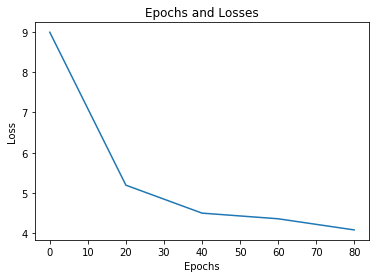

In [36]:
epoch=[0,20,40,60,80]
#plt.figure(0)
plt.title("Epochs and Losses")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(epoch,output1)
plt.show()

In [50]:
np.random.seed(10)
# Train on a small subset of the data to see what happens
model2 = RNNVanilla(vocabulary_size)
losses2 = train_with_sgd(model2, XTrain[:100], yTrain[:100], nepoch=100, evaluate_loss_after=20)

2019-11-03 22:00:30: Loss after num_examples_seen=0 epoch=0: 8.987368
2019-11-03 22:04:10: Loss after num_examples_seen=2000 epoch=20: 5.293429
2019-11-03 22:07:40: Loss after num_examples_seen=4000 epoch=40: 4.797202
2019-11-03 22:10:59: Loss after num_examples_seen=6000 epoch=60: 4.581530
2019-11-03 22:14:17: Loss after num_examples_seen=8000 epoch=80: 4.381856


In [51]:
output2 = [lis[1] for lis in losses2]
output2

[8.987368012561182,
 5.293428943592254,
 4.797202475850754,
 4.581529689449341,
 4.381855637794114]

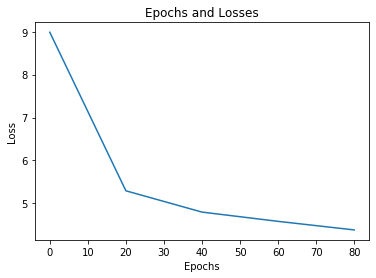

In [52]:
epoch=[0,20,40,60,80]
#plt.figure(0)
plt.title("Epochs and Losses")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(epoch,output2)
plt.show()

In [ ]:
#Findings :
#The loss should decrease with increase in number of epochs whether we double or half the Hidden layers
#or the sequence length